In [96]:
import osmnx as ox
import networkx as nx
import folium
from folium.plugins import MarkerCluster
from astar import AStar
from haversine import haversine

In [81]:
G = ox.graph_from_place("South Bengaluru, India", network_type='drive')

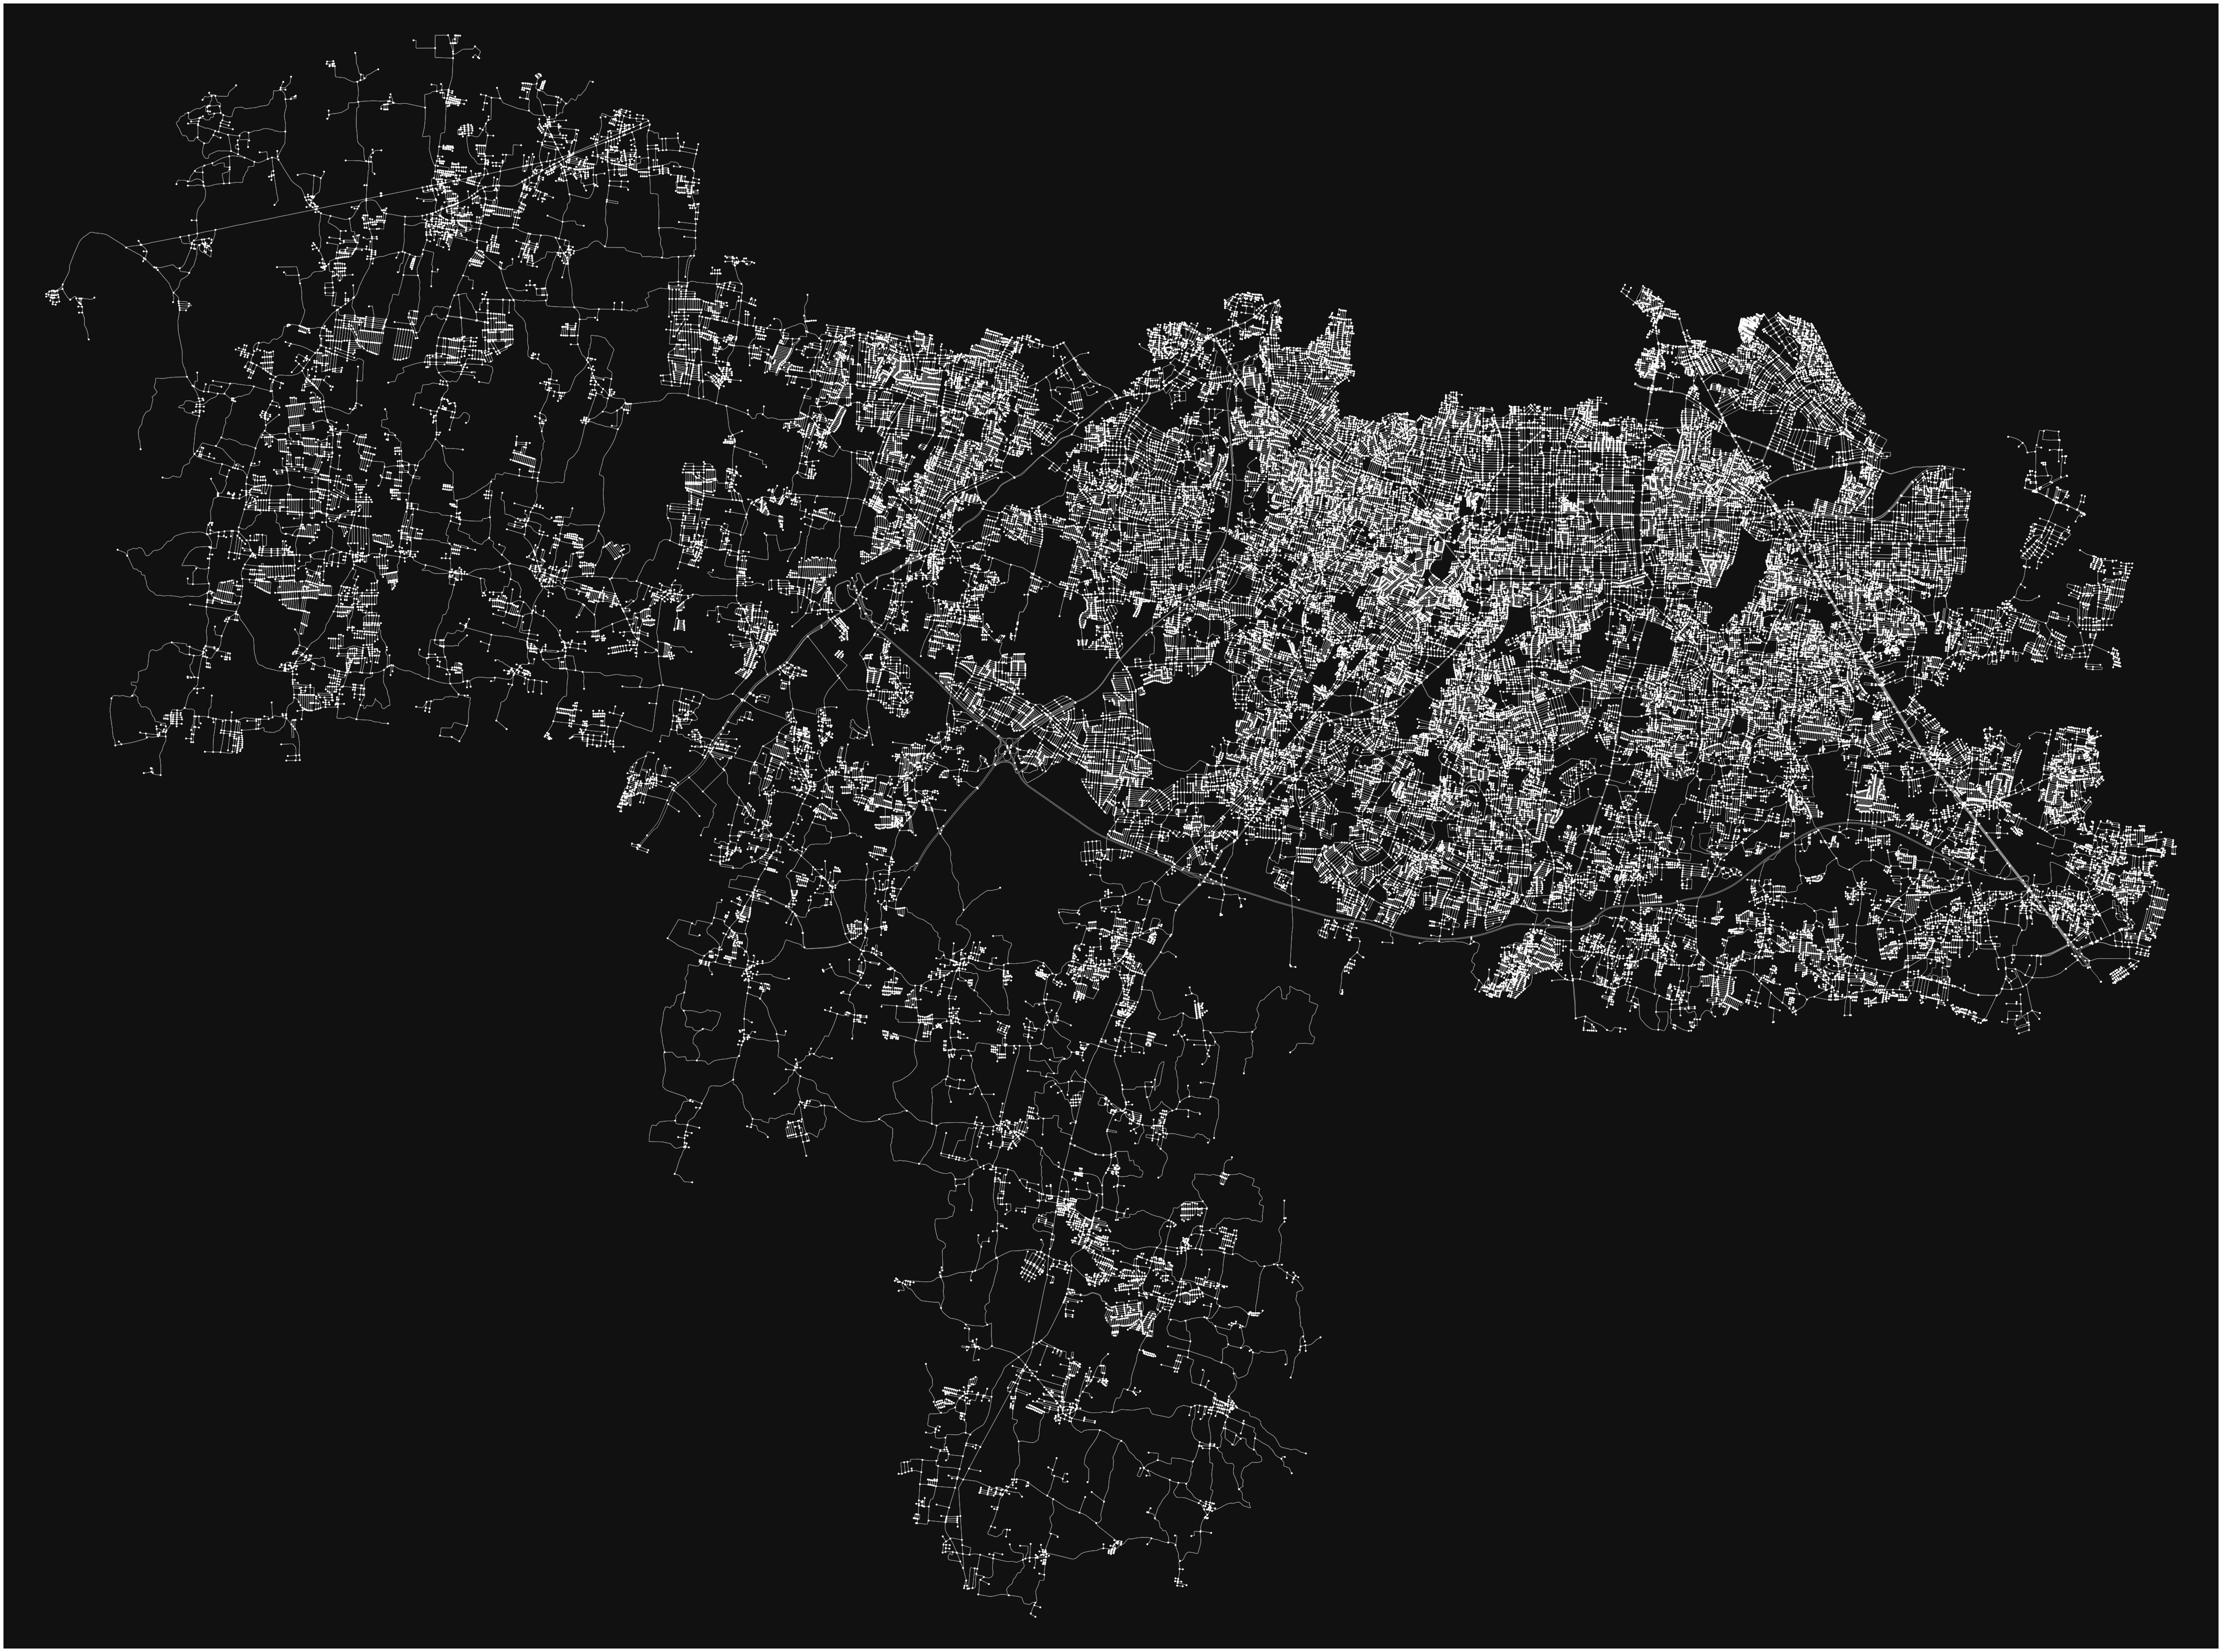

(<Figure size 5760x5760 with 1 Axes>, <AxesSubplot:>)

In [82]:
ox.plot_graph(G, figsize=(80,80))

In [87]:
source = ox.distance.nearest_nodes(G,12.902892, 77.648478)
destination = ox.distance.nearest_nodes(G,12.924477, 77.558277)

In [94]:
class MapGraph(AStar):
    def __init__(self,graph):
        self.graph = graph

    def heuristic_cost_estimate(self, n1, n2) -> float:
        if isinstance(n1, int):
            n1 = self.graph.nodes[n1]['x'], self.graph.nodes[n1]['y']
        if isinstance(n2, int):
            n2 = self.graph.nodes[n2]['x'], self.graph.nodes[n2]['y']
        x1, y1 = n1
        x2, y2 = n2
        return haversine((y1, x1), (y2, x2))
    
    def distance_between(self, n1, n2):
        if 'length' in self.graph[n1][n2]:
            return self.graph[n1][n2]['length']
        else:
            return 99999999 # return a large number if 'length' attribute is not present
    
    def neighbors(self, node):
        return list(self.graph.neighbors(node))

In [97]:
astar = MapGraph(G)
path = astar.astar(start_node, goal_node)
path = list(path)

In [89]:
m = folium.Map(location=(12.902892, 77.648478), zoom_start=12)

In [90]:
folium.Marker(location=(12.902892, 77.648478), popup='Source').add_to(m)
folium.Marker(location=(12.924477, 77.558277), popup='Source').add_to(m)

In [99]:
ox.plot_route_folium(G, path, m, zoom=12)